In [423]:
#import package
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler

In [424]:
# Load csv
data = pd.read_csv("boston.csv")

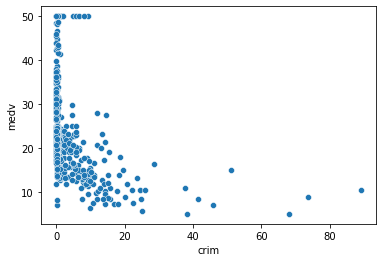

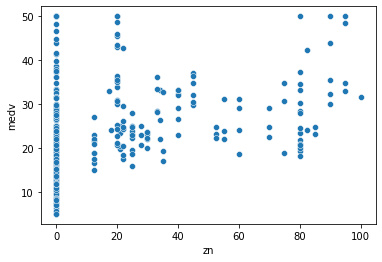

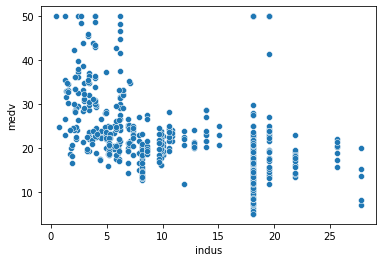

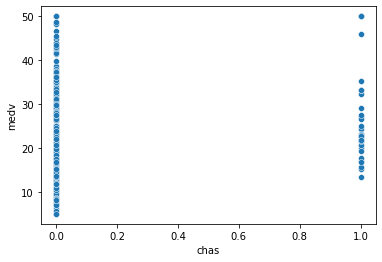

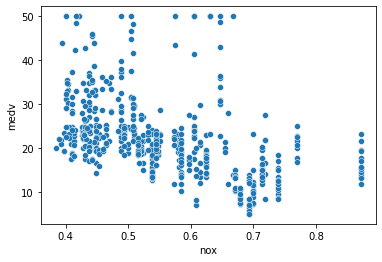

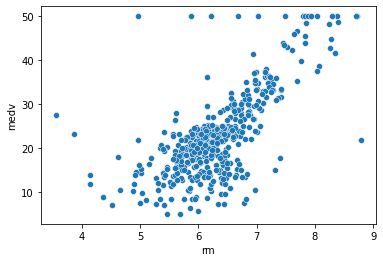

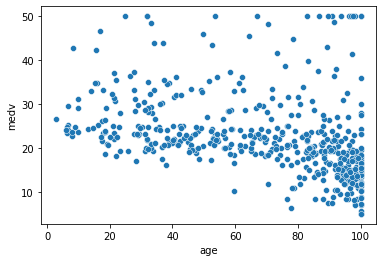

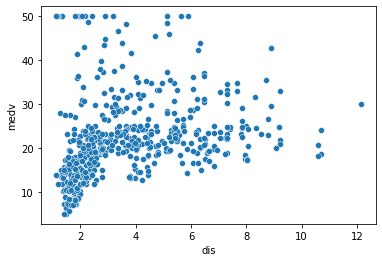

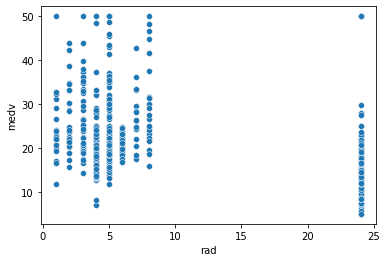

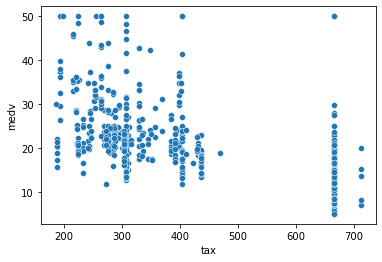

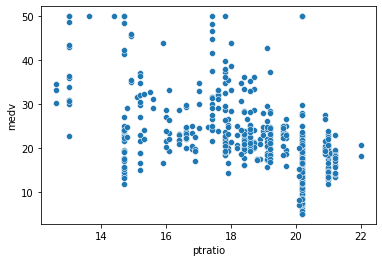

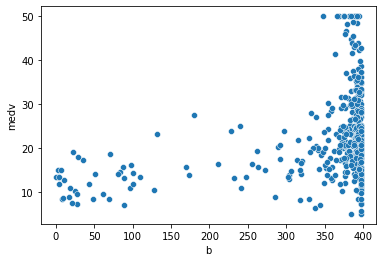

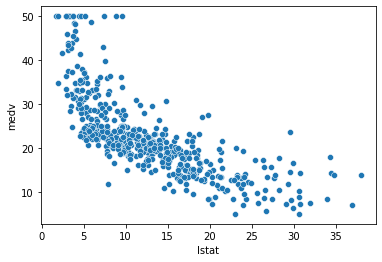

In [425]:
# Plot scatter graph of different features
for i in range(len(data.keys())-1):
    plot = sb.scatterplot(data=data, x=data.keys()[i], y=data.keys()[-1])
    plt.show()

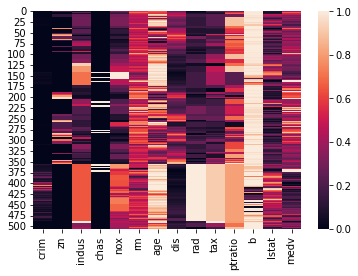

In [426]:
# Plot heatmap
norm_data = (data-data.min()) / (data.max()-data.min())
plot = sb.heatmap(data = norm_data)
plt.show()

In [427]:
# Load data
X = np.concatenate([content.values[np.newaxis, :-1] for _, content in data.iterrows()])
Y = np.concatenate([content.values[np.newaxis, -1:] for _, content in data.iterrows()])
X = np.nan_to_num(X)
Y = np.nan_to_num(Y)


In [428]:
# Selected column
feats = np.array([5, 12])
X = X[:, feats]

# Normalize
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
col = [data.keys()[i] for i in feats]
selected_data = pd.DataFrame(X, columns=col)
X = np.concatenate((np.ones((X.shape[0], 1), X.dtype), X), 1)

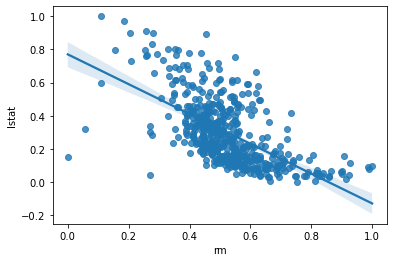

In [429]:
# Plot relevance
for i in range(len(selected_data.keys())):
    for j in range(i+1, len(selected_data.keys())):
        sb.regplot(data=selected_data, x=selected_data.keys()[i], y=selected_data.keys()[j])
        plt.show()

In [430]:
# Split data
def split_data(X, Y):
    m, _ = X.shape
    split_num = int(m * 0.8)
    dataset = list(range(m))
    random.shuffle(dataset)
    train_set = dataset[:split_num]
    test_set = dataset[split_num:]
    train_X = X[train_set, :]
    train_Y = Y[train_set, :]
    test_X = X[test_set, :]
    test_Y = Y[test_set, :]
    return train_X, train_Y, test_X, test_Y




In [431]:
# Loss function
def j(w, X, Y, lamb):
    res = 0.5 * np.square(X @ w - Y).sum().item() / X.shape[0] + 0.5 * (lamb * w.transpose() @ w).item()
    return res

#Caculate gradient
def calc_grad(w, X, Y, lamb):
    w_bar = w.copy()
    w_bar[0, 0] = 0
    return X.transpose() @ (X@w - Y) / X.shape[0] + lamb*w_bar
#Backtracking
def backtrack(w, X, Y, grad, sigma, gama, lamb):
    res = 1
    while True:
        #print(j(w-res*grad, X, Y, lamb) - j(w, X, Y, lamb))
        if j(w-res*grad, X, Y, lamb) - j(w, X, Y, lamb) <= (gama * res * grad.transpose() @ (-grad)).item():
            return res
        res *= sigma

#Judge terminate
def terminate(grad, threshold):
    return np.linalg.norm(grad) < threshold

#Gradient descend
def fit(X, Y, lamb, sigma, gama, threshold):
    w = np.random.randn(X.shape[1], 1)
    loss_step = []
    i = 0
    while True:
        grad = calc_grad(w, X, Y, lamb)

        if terminate(grad, threshold):
            return w, loss_step

        step = backtrack(w, X, Y, grad, sigma, gama, lamb)
        w -= step * grad
        loss = j(w, X, Y, lamb)
        loss_step.append(np.sqrt(loss))
        i+=1

In [432]:
# Training
def train(X, Y, lamb, sigma, gama, threshold):
    w, loss_step = fit(X, Y, lamb=lamb, sigma=sigma, gama=gama, threshold=threshold)
    return w, loss_step

#Testing
def test(w, X, Y):
    rmse = np.sqrt(j(w, X, Y, 0))
    return rmse

loss_steps = []
rmses = []
train_X, train_Y, test_X, test_Y = split_data(X, Y)


#Setting parameters
lamb=0
sigma=0.5
gama=0.1
threshold=1e-6
for i in range(10):
    print(f"-----------Exiperiment-{i+1}-----------")
    w, loss_step = train(train_X, train_Y, lamb=lamb, sigma=sigma, gama=gama, threshold=threshold)
    print(f"Exiperiment{i+1} terminate at {len(loss_step)} iterations")
    print("Training rmse: ", loss_step[-1])
    print()
    print()
    loss_step = np.array(loss_step)[:, np.newaxis]
    loss_step = np.concatenate((np.arange(loss_step.shape[0])[:, np.newaxis], loss_step), axis=1)
    loss_step = pd.DataFrame(data=loss_step,columns=["iter", "rmse"])
    loss_steps.append(loss_step)
    rmses.append(test(w, train_X, train_Y))

for i in range(10):
    sb.lineplot(data=loss_steps[i], x="iter", y="rmse").set(title=f'Experiment-{i+1}')
    plt.show()

for i in range(10):
    print(f"Experiment{i+1} test rmse: {rmses[i]}")
    
print(f"Mean test rmse: {sum(rmses) / len(rmses)}")



-----------Exiperiment-1-----------
Exiperiment1 terminate at 1305 iterations
Training rmse:  3.830332235011822


-----------Exiperiment-2-----------
Exiperiment2 terminate at 1330 iterations
Training rmse:  3.8303322350119116


-----------Exiperiment-3-----------
Exiperiment3 terminate at 1287 iterations
Training rmse:  3.830332235011819


-----------Exiperiment-4-----------
Exiperiment4 terminate at 1336 iterations
Training rmse:  3.830332235011912


-----------Exiperiment-5-----------
Exiperiment5 terminate at 1304 iterations
Training rmse:  3.830332235011805


-----------Exiperiment-6-----------
Exiperiment6 terminate at 1424 iterations
Training rmse:  3.83033223501182


-----------Exiperiment-7-----------
Exiperiment7 terminate at 1153 iterations
Training rmse:  3.8303322350119178


-----------Exiperiment-8-----------
Exiperiment8 terminate at 1350 iterations
Training rmse:  3.830332235011889


-----------Exiperiment-9-----------
Exiperiment9 terminate at 1232 iterations
Training 

ValueError: Could not interpret value `loss` for parameter `y`